<div style="text-align: center"> Ahmed Gurbuz | SMU Bootcamp </div>

In [1]:
# Import dependencies and retrieve connection to the PostgreSQL Database
import pandas as pd
import psycopg2
from matplotlib import pylab
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
import pylab as pl
import scipy as sp
%matplotlib inline

# Import postgreSQL password
from config import postgres_pass

# Connect to database 
# https://stackoverflow.com/questions/9353822/connecting-postgresql-with-sqlalchemy
# https://stackoverflow.com/questions/47928883/postgresql-error-when-trying-to-connect-in-python-invalid-dsn-invalid-connect
conn = psycopg2.connect(host="localhost", user="postgres", password = postgres_pass ,database = "employees_db")

In [2]:
# source: https://datatofish.com/sql-to-pandas-dataframe/ 
df = pd.read_sql_query('''SELECT e.emp_no, s.salary
FROM employees AS e
INNER JOIN salaries AS s ON e.emp_no = s.emp_no''', conn)

#Display data
df.head()

,emp_no,salary
0,10001,60117
1,10005,78228
2,10010,72488
3,10011,42365
4,10013,40000


In [3]:
#Check salary column value counts
df.salary.value_counts().head()

40000    95346
55581       19
53738       18
53078       18
47454       17
Name: salary, dtype: int64

In [4]:
# Create bins in which to place values based upon salary column 
bins = [0, 39999, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999, 139999]

# Create labels for these bins
group = ["<40K", "40K-50K", "50K-60K", "60K-70K", "70K-80K", "80K-90K", "90K-100K", "100K-110K", "110K-120K", "120K-130K", "+130K"]

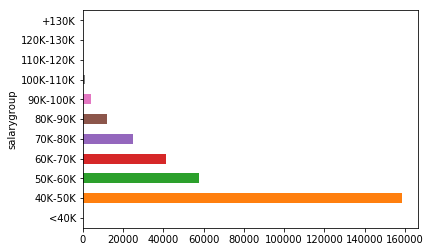

In [5]:
# Slice the data and place it into bins
# Place the data series into a new column inside of the DataFrame
df["salarygroup"] = pd.cut(df.salary, bins, labels = group)

# Create a GroupBy object based upon "Salary Group"
salary_group_df = df.groupby('salarygroup')

# Find total (unique) values
total_salary_group = salary_group_df["emp_no"].nunique()

# Display in quick barchart
total_salary_group.plot(kind="barh")

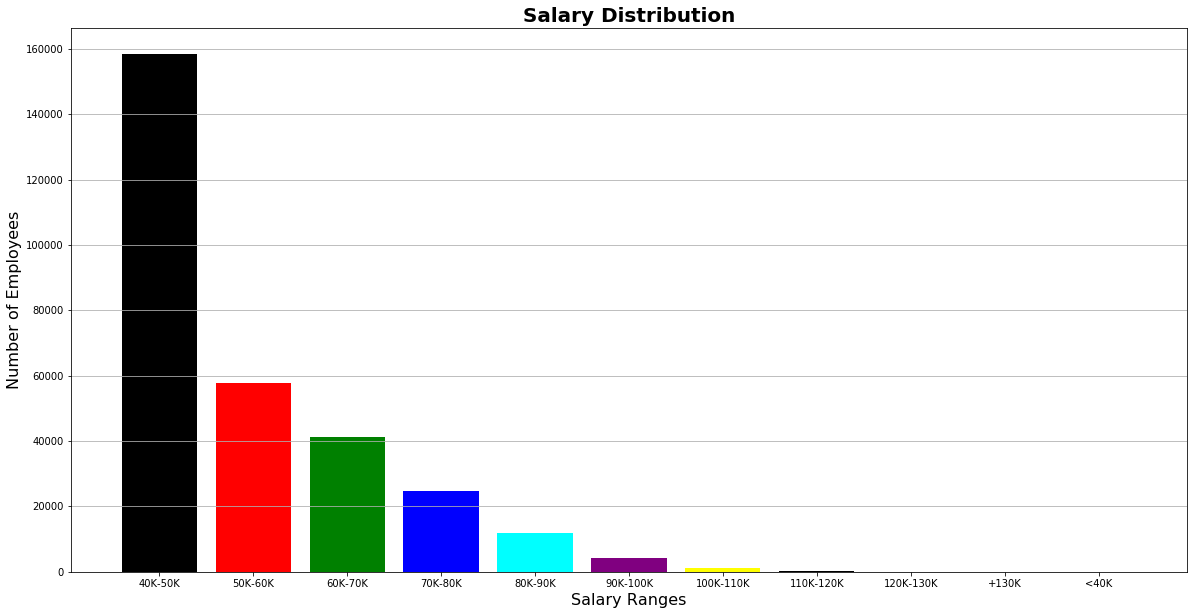

In [27]:
# Create DataFrame and reset index
salaryData = pd.DataFrame(df.salarygroup.value_counts()).reset_index()

#Rename columns
salaryData.columns = ["salaryrange", "employeecount"]

# Design Bar chart size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Create horizontal grid
ax.xaxis.grid(True)
pylab.grid()

# Create title and labels for x and y axis 
plt.bar(salaryData.salaryrange, salaryData.employeecount, color= ['black', 'red', 'green', 'blue', 'cyan', 'purple', 'yellow']) #https://python-graph-gallery.com/3-control-color-of-barplots/
plt.title("Salary Distribution", weight="bold", fontsize=20)
plt.xlabel("Salary Ranges", fontsize=16)
plt.ylabel("Number of Employees", fontsize=16)

# Show chart
plt.show()

Text(0, 0.5, 'Number of Employees')

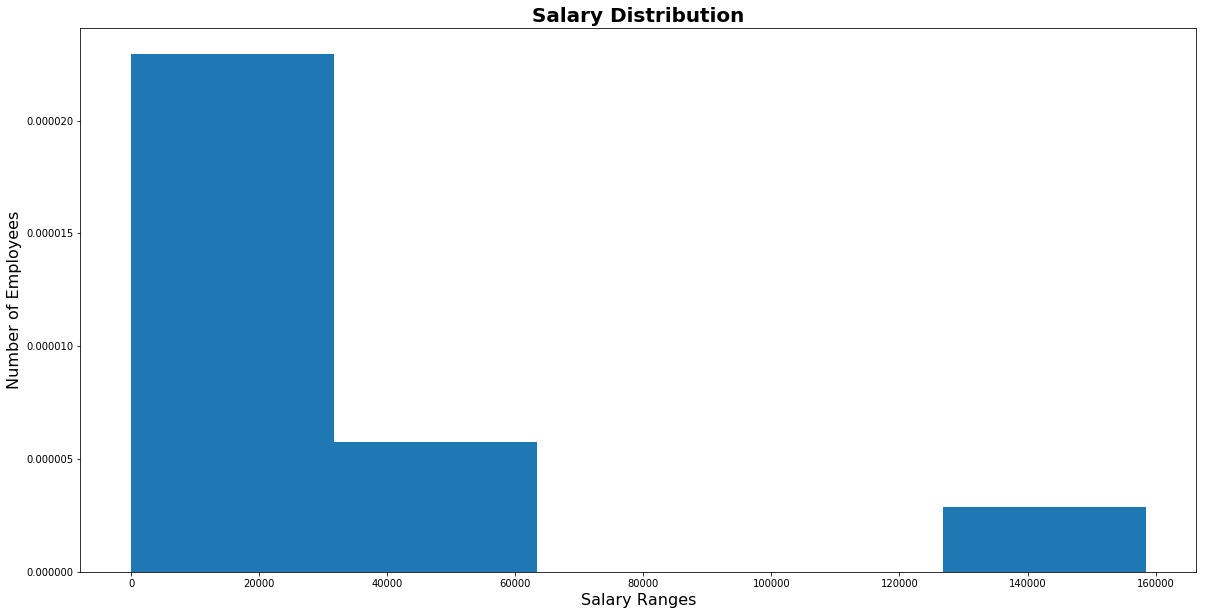

In [7]:
# Design chart size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Create a histogram
plt.hist(salaryData.employeecount, density=True, bins=5)

# Create title and labels for x and y axis 
plt.title("Salary Distribution", weight="bold", fontsize=20)
plt.xlabel("Salary Ranges", fontsize=16)
plt.ylabel("Number of Employees", fontsize=16)

In [8]:
# Run query
df_s = pd.read_sql_query('''SELECT t.title, s.salary
FROM titles AS t
INNER JOIN salaries AS s ON t.emp_no = s.emp_no''', conn)

# Display data
df_s.head()

,title,salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


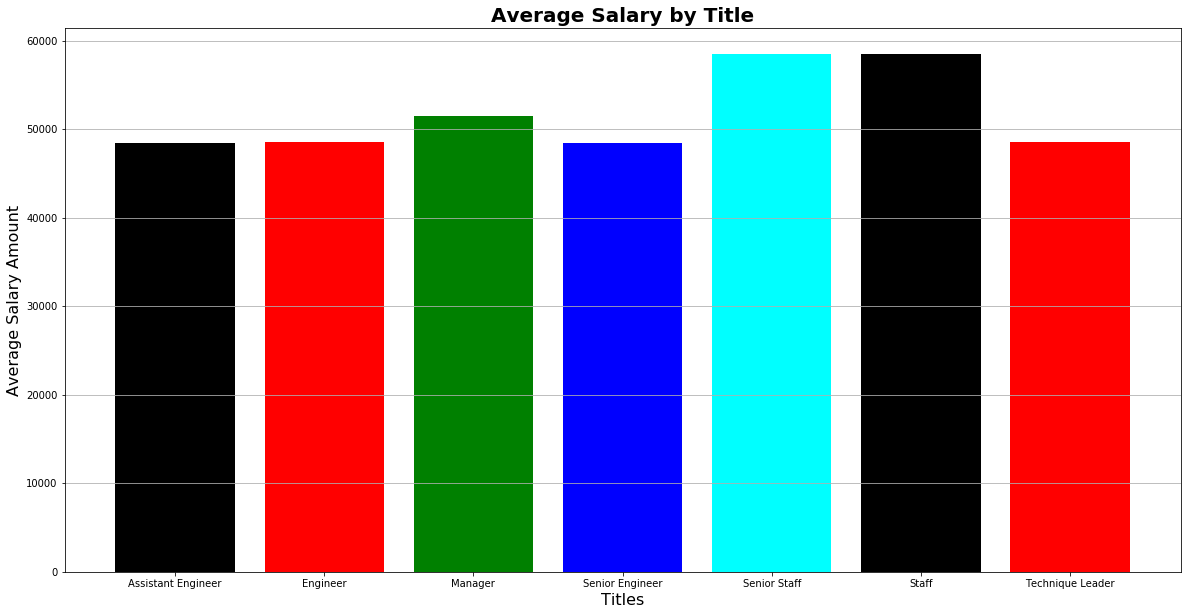

In [28]:
# Count the total number of salaries by title category
total_count_df = df_s.groupby(['title']).count()

# Find average salaries by title category
avg_count_df = round(df_s.groupby(['title']).mean())

# Drop index
avg_data = avg_count_df.reset_index()

# Design Bar chart size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Create horizontal grid
ax.xaxis.grid(True)
pylab.grid()

# Create title and labels for x and y axis 
plt.bar(avg_data.title, avg_data.salary, color= ['black', 'red', 'green', 'blue', 'cyan'] ) #https://python-graph-gallery.com/3-control-color-of-barplots/
plt.title("Average Salary by Title", weight="bold", fontsize=20)
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Average Salary Amount", fontsize=16)

# Show chart
plt.show()